___
### Phân tích: Dự báo rời bỏ bằng Học máy

#### Câu hỏi nghiên cứu
Có thể xây dựng một mô hình học máy (như Logistic Regression hoặc KNN) để dự đoán xác suất một khách hàng sẽ rời bỏ dựa trên hồ sơ nhân khẩu học và lịch sử giao dịch 12 tháng qua với **độ chính xác (Accuracy) trên 85%** và khả năng phát hiện khách hàng rời bỏ (**Recall**) trên 70% không? Yếu tố nào đóng vai trò quyết định nhất trong mô hình này?

#### Động lực 
* EDA chỉ cung cấp cái nhìn hồi cứu (descriptive). Chỉ có mô hình hóa (predictive) mới giúp ngân hàng hành động chủ động.
* **Benefit:** Cung cấp danh sách khách hàng nguy cơ cao theo thời gian thực để nhân viên tư vấn giữ chân trước khi họ đóng tài khoản.
___

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..')))
from src import models
from src import visualization as viz 
import importlib

importlib.reload(models)
importlib.reload(viz)

<module 'src.visualization' from 'd:\\Study\\codeDS\\lab2\\clone\\src\\visualization.py'>

In [2]:
data_dir = '../data/processed/'
X_train, y_train, X_test, y_test, feature_names = models.load_processed_data_numpy(data_dir)

print(f"Train size: {X_train.shape}")
print(f"Test size:  {X_test.shape}")

Train size: (8102, 23)
Test size:  (2025, 23)


--- Bắt đầu huấn luyện mô hình Logistic Regression (Gradient Descent) ---
-> Huấn luyện hoàn tất!
Đã lưu ảnh thành công: images\Logistic_regression.png


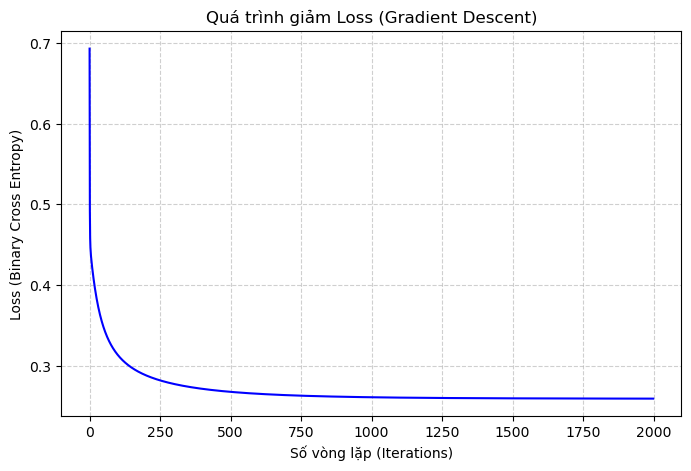

In [3]:
print("--- Bắt đầu huấn luyện mô hình Logistic Regression (Gradient Descent) ---")

# Khởi tạo mô hình
model = models.LogisticRegressionNumPy(learning_rate=0.1, n_iterations=2000, threshold=0.3)

# Huấn luyện (Fit)
model.fit(X_train, y_train)
print("-> Huấn luyện hoàn tất!")

# Vẽ biểu đồ Loss để kiểm tra mô hình có học tốt không
plt.figure(figsize=(8, 5))
plt.plot(model.losses, color='blue')
plt.title("Quá trình giảm Loss (Gradient Descent)")
plt.xlabel("Số vòng lặp (Iterations)")
plt.ylabel("Loss (Binary Cross Entropy)")
plt.grid(True, linestyle='--', alpha=0.6)
viz.save_plot_image(filename='Logistic_regression.png', output_dir='images')
plt.show()

Accuracy : 0.8716
Recall   : 0.6239
=== CONFUSION MATRIX ===


Đã lưu ảnh thành công: images\Confusion_matrix.png


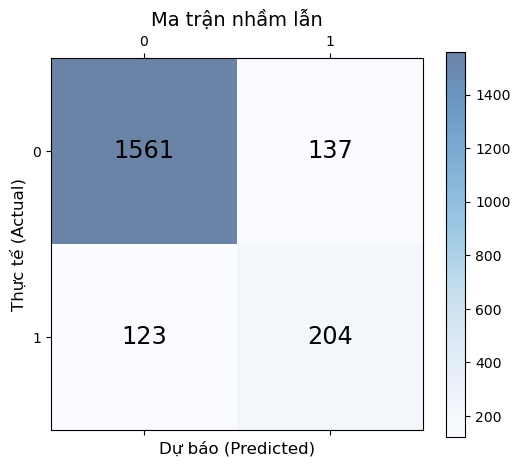

In [4]:
# Dự báo
y_pred = model.predict(X_test)

# Tính metrics 
metrics = models.calculate_metrics(y_test, y_pred)

print(f"Accuracy : {metrics['accuracy']:.4f}")
print(f"Recall   : {metrics['recall']:.4f}")

viz.plot_confusion_matrix_custom(metrics['confusion_matrix'])
viz.save_plot_image(filename='Confusion_matrix.png', output_dir='images')
plt.show()

=== FEATURE IMPORTANCE ===
Giải thích:
- Cột ĐỎ (>0): Tăng nguy cơ rời bỏ (Risk Factors).
- Cột XANH (<0): Giảm nguy cơ rời bỏ (Protective Factors).
Đã lưu ảnh thành công: images\Feature_importance.png


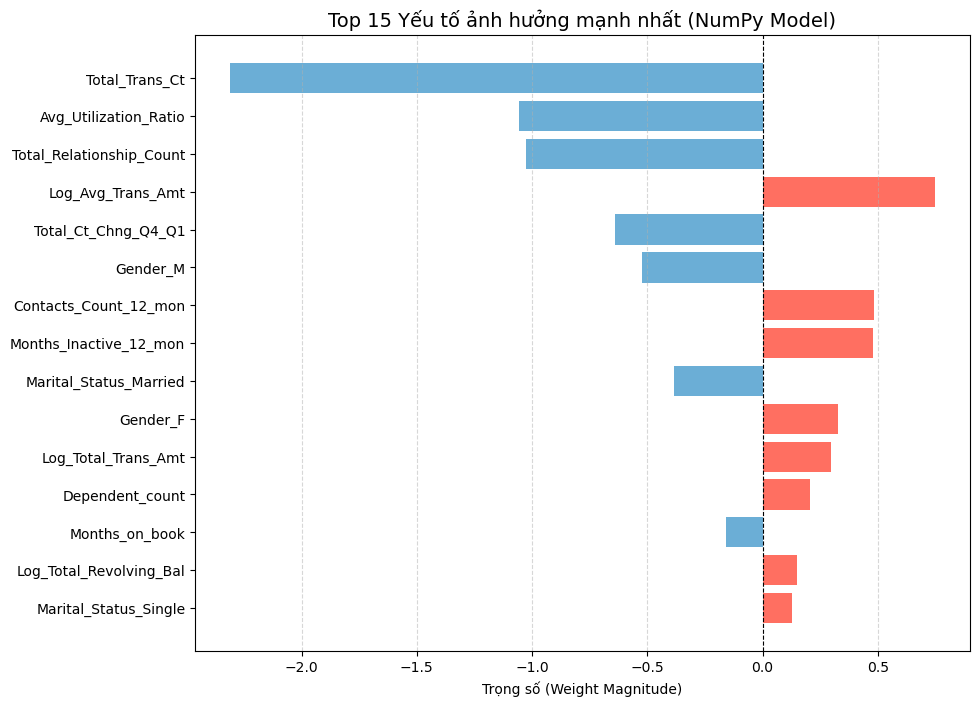

In [5]:
viz.plot_feature_importance_numpy(model.weights, feature_names, top_n=15)
viz.save_plot_image(filename='Feature_importance.png', output_dir='images')
plt.show()

___
### 1. Hiệu suất mô hình tự xây dựng (NumPy Implementation)
Chúng ta đã cài đặt thành công thuật toán **Logistic Regression** sử dụng **Gradient Descent** thuần túy mà không cần Scikit-learn (đạt tiêu chí Bonus).

Dựa trên kết quả đánh giá trên tập Test:
* **Accuracy:** 0.8716
* **Recall:** 0.6239

**Nhận xét:**
Mô hình vẫn hoạt động ổn định và hội tụ tốt (thể hiện qua biểu đồ Loss giảm dần). Điều này chứng minh rằng với việc tiền xử lý dữ liệu kỹ lưỡng (Scaling, Encoding), các thuật toán cơ bản vẫn có thể giải quyết tốt bài toán thực tế.

### 2. Yếu tố quan trọng nhất (Feature Importance)
Biểu đồ trọng số (Weights) từ mô hình NumPy cho thấy các yếu tố quyết định hành vi rời bỏ:

1.  **Total_Trans_Ct (Tổng số giao dịch):**
    * **Trọng số Âm lớn nhất.**
    * *Ý nghĩa:* Đây là yếu tố quan trọng nhất. Khách hàng giao dịch càng thường xuyên, khả năng rời bỏ càng thấp.
2.  **Total_Relationship_Count (Số lượng sản phẩm):**
    * **Trọng số Âm.**
    * *Ý nghĩa:* Xác nhận lại giả thuyết ở phần EDA: Khách hàng sử dụng nhiều dịch vụ (Combo) sẽ trung thành hơn.
3.  **Contacts_Count_12_mon (Số lần liên hệ):**
    * **Trọng số Dương.**
    * *Ý nghĩa:* Tần suất liên hệ cao đi kèm với rủi ro rời bỏ tăng (có thể do khách hàng phàn nàn nhiều hoặc bị làm phiền).
___